# Import the raw data files and inspect

In [94]:
import numpy as np

data = np.genfromtxt('data.csv', delimiter=',')
labels = np.genfromtxt('data_labels.csv', delimiter=',')

In [95]:
data.shape, labels.shape

((3486, 354), (3486,))

In [96]:
unique_labels, labels_count = np.unique(labels, return_counts=True)
for index, label in enumerate(unique_labels):
    print('Label %d - %d data points'%(unique_labels[index], labels_count[index]))

Label 1 - 1625 data points
Label 2 - 233 data points
Label 3 - 30 data points
Label 4 - 483 data points
Label 5 - 287 data points
Label 6 - 310 data points
Label 7 - 52 data points
Label 8 - 466 data points


# Proceed to apply Oversampling

In [98]:
import pandas as pd
df_train = pd.read_csv('data.csv', header=None)
df_train.insert(0, 'target', pd.read_csv('data_labels.csv', header=None), allow_duplicates = False)

In [99]:
target_count = df_train.target.value_counts()
target_count

1    1625
4     483
8     466
6     310
5     287
2     233
7      52
3      30
Name: target, dtype: int64

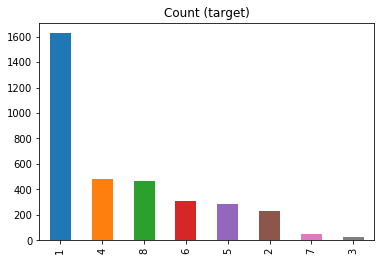

In [100]:
target_count.plot(kind='bar', title='Count (target)');

In [101]:
# Class count
class_counts = df_train.target.value_counts()

In [102]:
# Divide by class
df_class_1 = df_train[df_train['target'] == 1]
df_class_2 = df_train[df_train['target'] == 2]
df_class_3 = df_train[df_train['target'] == 3]
df_class_4 = df_train[df_train['target'] == 4]
df_class_5 = df_train[df_train['target'] == 5]
df_class_6 = df_train[df_train['target'] == 6]
df_class_7 = df_train[df_train['target'] == 7]
df_class_8 = df_train[df_train['target'] == 8]

In [106]:
# Random over-sampling
OVERSAMPLE_AMOUNT = int(0.7*max(class_counts))
print('OVERSAMPLE_AMOUNT=',OVERSAMPLE_AMOUNT)
df_class_2_over = df_class_2.sample(OVERSAMPLE_AMOUNT, replace=True)
df_class_3_over = df_class_3.sample(OVERSAMPLE_AMOUNT, replace=True)
df_class_4_over = df_class_4.sample(OVERSAMPLE_AMOUNT, replace=True)
df_class_5_over = df_class_5.sample(OVERSAMPLE_AMOUNT, replace=True)
df_class_6_over = df_class_6.sample(OVERSAMPLE_AMOUNT, replace=True)
df_class_7_over = df_class_7.sample(OVERSAMPLE_AMOUNT, replace=True)
df_class_8_over = df_class_8.sample(OVERSAMPLE_AMOUNT, replace=True)

df_train_over = pd.concat([df_class_1, df_class_2_over, df_class_3_over,
                           df_class_4_over, df_class_5_over, df_class_6_over,
                          df_class_7_over, df_class_8_over], axis=0)

OVERSAMPLE_AMOUNT= 1137


In [107]:
df_train_over.shape

(9584, 355)

In [110]:
df_train_over = df_train_over.sample(frac=1).reset_index(drop=True)

In [111]:
df_train_over.head()

,target,0,1,2,3,4,5,6,7,8,...,344,345,346,347,348,349,350,351,352,353
0,2,0.007547,0.005735,0.000081,0.006603,0.00009,0.006149,0.000094,0.006419,0.000085,...,0.030089,0.007349,0.023148,0.002864,0.028195,0.009919,0.041559,0.004032,0.92070,0.104580
1,7,0.025467,0.020451,0.000658,0.002388,0.00000,0.012716,0.000340,0.008422,0.000000,...,0.057868,0.002302,0.024832,0.000766,0.013716,0.006728,0.022613,0.000000,0.83804,0.093915
2,4,0.008654,0.006158,0.000000,0.008502,0.00000,0.008483,0.000417,0.008739,0.000136,...,0.022082,0.031379,0.024815,0.004945,0.036560,0.025906,0.022825,0.003297,0.86846,0.244930
3,1,0.086792,0.012957,0.000000,0.008717,0.00000,0.061774,0.000000,0.016146,0.000000,...,0.005749,0.000000,0.013269,0.005079,0.004612,0.000000,0.005848,0.011578,0.92830,0.077814
4,1,0.022101,0.014702,0.000000,0.009695,0.00000,0.020232,0.000000,0.014564,0.000000,...,0.030710,0.039990,0.010271,0.009950,0.014205,0.012776,0.018091,0.022878,0.69396,0.205450


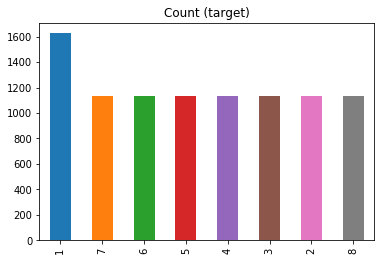

In [112]:
target_count = df_train_over.target.value_counts()
target_count.plot(kind='bar', title='Count (target)');

# Split the "balanced" data into train and validation sets

In [113]:
mask = np.random.rand(len(df_train_over)) < 0.8

df_training_set = df_train_over[mask]
df_validation_set = df_train_over[~mask]

In [114]:
df_validation_set.shape, df_training_set.shape

((1910, 355), (7674, 355))

In [115]:
df_validation_labels = df_validation_set['target']
df_validation_labels.shape


(1910,)

In [116]:
df_validation_data = df_validation_set.drop('target', axis=1)
df_validation_data.shape

(1910, 354)

In [117]:
df_training_labels = df_training_set['target']
df_training_labels.shape

(7674,)

In [118]:
df_training_data = df_training_set.drop('target', axis=1)
df_training_data.shape

(7674, 354)

In [120]:
df_validation_labels.to_csv('validation_labels.csv', header=False, index=False)
df_validation_data.to_csv('validation_set.csv', header=False, index=False)
df_training_labels.to_csv('training_labels.csv', header=False, index=False)
df_training_data.to_csv('training_set.csv', header=False, index=False)